### Financial Statement

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-statements-of-major-companies2009-2023/Financial Statements.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [3]:
df=pd.read_csv('/kaggle/input/financial-statements-of-major-companies2009-2023/Financial Statements.csv')
df.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [4]:
df.shape

(161, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 161 non-null    int64  
 1   Company                              161 non-null    object 
 2   Category                             161 non-null    object 
 3   Market Cap(in B USD)                 160 non-null    float64
 4   Revenue                              161 non-null    float64
 5   Gross Profit                         161 non-null    float64
 6   Net Income                           161 non-null    float64
 7   Earning Per Share                    161 non-null    float64
 8   EBITDA                               161 non-null    float64
 9   Share Holder Equity                  161 non-null    float64
 10  Cash Flow from Operating             161 non-null    float64
 11  Cash Flow from Investing        

In [6]:
df.head(2)

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979


In [7]:
df.columns

Index(['Year', 'Company ', 'Category', 'Market Cap(in B USD)', 'Revenue',
       'Gross Profit', 'Net Income', 'Earning Per Share', 'EBITDA',
       'Share Holder Equity', 'Cash Flow from Operating',
       'Cash Flow from Investing', 'Cash Flow from Financial Activities',
       'Current Ratio', 'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI',
       'Net Profit Margin', 'Free Cash Flow per Share',
       'Return on Tangible Equity', 'Number of Employees',
       'Inflation Rate(in US)'],
      dtype='object')

In [8]:
df=df.rename(columns={'Company ':'Company'})
df

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.1100,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.6100,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.2800,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.9700,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.9800,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2013,AMZN,LOGI,182.54,74452.0,20271.0,274.0,0.0295,3998.0,9746.0,...,1.0716,0.3274,2.8114,0.6823,2.1180,0.3680,0.1748,3.8641,117300,1.4648
157,2012,AMZN,LOGI,113.63,61093.0,15122.0,-39.0,-0.0045,2835.0,8192.0,...,1.1207,0.3765,-0.4761,-0.1198,-0.3459,-0.0638,-0.1833,-0.6915,88400,2.0693
158,2011,AMZN,LOGI,78.72,48077.0,10789.0,631.0,0.0685,1945.0,7757.0,...,1.1741,0.0329,8.1346,2.4962,7.8757,1.3125,-0.0490,10.8756,56200,3.1568
159,2010,AMZN,LOGI,80.79,34204.0,7643.0,1152.0,0.1265,1974.0,6864.0,...,1.3254,0.2274,16.7832,6.1286,13.6736,3.3680,-0.0544,20.8885,33700,1.6400


In [9]:
df['Category'].unique()

array(['IT', 'FinTech', 'Bank', 'Manufacturing', 'Finance', 'FOOD',
       'BANK', 'ELEC', 'LOGI'], dtype=object)

In [10]:
df['Category'] = df['Category'].replace('Bank','BANK')
df['Category'].unique()

array(['IT', 'FinTech', 'BANK', 'Manufacturing', 'Finance', 'FOOD',
       'ELEC', 'LOGI'], dtype=object)

In [11]:
df['Company'].unique()

array(['AAPL', 'MSFT', 'GOOG', 'PYPL', 'AIG', 'PCG', 'SHLDQ', 'MCD',
       'BCS', 'NVDA', 'INTC', 'AMZN'], dtype=object)

In [12]:
def analyzer(company,metric):
    temp = df[df['Company']==company]
    temp.groupby('Year')[metric].sum().plot(kind='line')
    plt.title(f"{metric} of {company} over the years")
    plt.grid()
    plt.show()

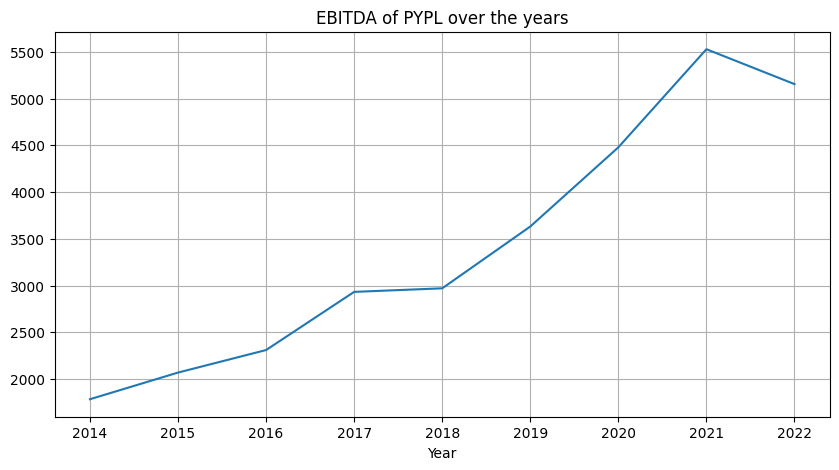

In [13]:
analyzer('PYPL','EBITDA')

In [14]:
df.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [15]:
met=['Market Cap(in B USD)', 'Revenue',
       'Gross Profit', 'Net Income', 'Earning Per Share', 'EBITDA',
       'Share Holder Equity', 'Cash Flow from Operating',
       'Cash Flow from Investing', 'Cash Flow from Financial Activities',
       'Current Ratio', 'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI',
       'Net Profit Margin', 'Free Cash Flow per Share',
       'Return on Tangible Equity', 'Number of Employees',
       'Inflation Rate(in US)']

In [16]:
metric=df[met]
metric

,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,Cash Flow from Operating,Cash Flow from Investing,Cash Flow from Financial Activities,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2066.94,394328.0,170782.0,99803.0,6.1100,130541.0,50672.0,122151.0,-22354.0,-110749.0,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2913.28,365817.0,152836.0,94680.0,5.6100,120233.0,63090.0,104038.0,-14545.0,-93353.0,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2255.97,274515.0,104956.0,57411.0,3.2800,77344.0,65339.0,80674.0,-4289.0,-86820.0,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,1304.76,260174.0,98392.0,55256.0,2.9700,76477.0,90488.0,69391.0,45896.0,-90976.0,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,748.54,265595.0,101839.0,59531.0,2.9800,81801.0,107147.0,77434.0,16066.0,-87876.0,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,182.54,74452.0,20271.0,274.0,0.0295,3998.0,9746.0,5475.0,-4276.0,-539.0,1.0716,0.3274,2.8114,0.6823,2.1180,0.3680,0.1748,3.8641,117300,1.4648
157,113.63,61093.0,15122.0,-39.0,-0.0045,2835.0,8192.0,4180.0,-3595.0,2259.0,1.1207,0.3765,-0.4761,-0.1198,-0.3459,-0.0638,-0.1833,-0.6915,88400,2.0693
158,78.72,48077.0,10789.0,631.0,0.0685,1945.0,7757.0,3903.0,-1930.0,-482.0,1.1741,0.0329,8.1346,2.4962,7.8757,1.3125,-0.0490,10.8756,56200,3.1568
159,80.79,34204.0,7643.0,1152.0,0.1265,1974.0,6864.0,3495.0,-3360.0,181.0,1.3254,0.2274,16.7832,6.1286,13.6736,3.3680,-0.0544,20.8885,33700,1.6400


In [17]:
metric['Market Cap(in B USD)'].fillna(metric['Market Cap(in B USD)'].median(),inplace=True)

<Axes: >

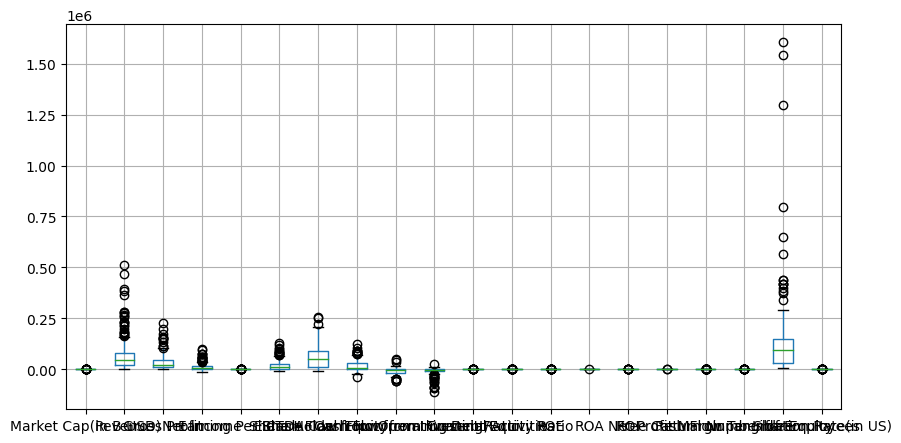

In [18]:
metric.boxplot()

In [19]:
len(met)

20

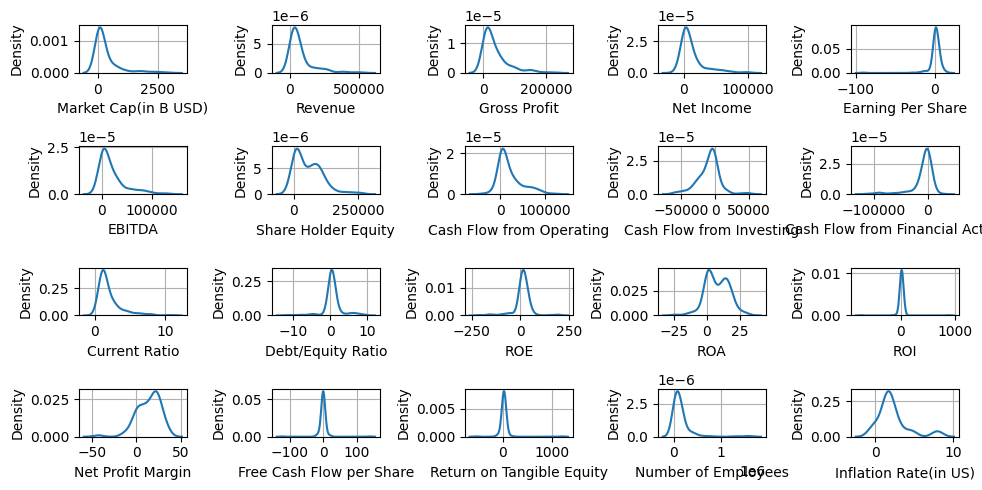

In [20]:
r=4
c=5
it=1
for i in met:
    plt.subplot(r,c,it)
    sns.kdeplot(df[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [21]:
metric.skew()

Market Cap(in B USD)                   2.631367
Revenue                                2.435343
Gross Profit                           2.001979
Net Income                             2.248265
Earning Per Share                     -7.325464
EBITDA                                 1.896893
Share Holder Equity                    1.135609
Cash Flow from Operating               1.304909
Cash Flow from Investing              -0.183856
Cash Flow from Financial Activities   -2.905620
Current Ratio                          2.358976
Debt/Equity Ratio                     -0.439812
ROE                                   -1.042900
ROA                                   -0.132727
ROI                                    1.802308
Net Profit Margin                     -1.046331
Free Cash Flow per Share               1.337745
Return on Tangible Equity              6.745916
Number of Employees                    4.492091
Inflation Rate(in US)                  1.648488
dtype: float64

In [22]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [23]:
metric = pd.DataFrame(rs.fit_transform(metric),columns=met)
metric

,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,Cash Flow from Operating,Cash Flow from Investing,Cash Flow from Financial Activities,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,6.201949,6.330089,4.051358,7.150557,1.489655,4.737105,0.036368,4.080654,-0.999854,-11.163410,-0.313425,2.441292,7.895406,1.560634,3.004900,0.552936,0.808977,5.739669,0.580700,5.241829
1,8.888487,5.811977,3.570567,6.765137,1.317241,4.332155,0.193126,3.436613,-0.525212,-9.387327,-0.180942,1.958978,5.866456,1.465618,2.343545,0.584537,0.817845,4.220737,0.495303,2.443438
2,6.801987,4.152803,2.287815,3.961270,0.513793,2.647260,0.221516,2.605863,0.098162,-8.720326,0.015203,1.644559,3.174687,0.798975,1.215734,0.310154,0.580474,2.205599,0.435525,-0.489924
3,3.782560,3.892194,2.111959,3.799142,0.406897,2.613200,0.538983,2.204676,3.148477,-9.144642,0.134994,0.997544,2.014899,0.697875,0.950746,0.328076,-0.234750,1.337347,0.350128,0.000000
4,2.016951,3.990706,2.204308,4.120764,0.410345,2.822353,0.749277,2.490659,1.335367,-8.828141,-0.141374,0.843405,1.776709,0.694595,0.912557,0.393029,0.366931,1.159031,0.307430,0.533785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.220296,0.517185,0.019022,-0.337331,-0.607069,-0.234139,-0.480259,-0.067974,0.098952,0.088722,-0.182978,-0.066814,-0.505866,-0.429513,-0.640801,-0.824536,-0.070024,-0.515670,0.181896,-0.294157
157,0.001555,0.274420,-0.118925,-0.360879,-0.618793,-0.279827,-0.499876,-0.114020,0.140344,0.374390,-0.149654,-0.006509,-0.648124,-0.487328,-0.779891,-0.848383,-0.346186,-0.663249,-0.064902,0.217697
158,-0.109259,0.037889,-0.235010,-0.310472,-0.593621,-0.314791,-0.505367,-0.123869,0.241545,0.094542,-0.113411,-0.428519,-0.275517,-0.298766,-0.315771,-0.772373,-0.242616,-0.288531,-0.339880,1.138527
159,-0.102689,-0.214217,-0.319295,-0.271276,-0.573621,-0.313652,-0.516640,-0.138376,0.154628,0.162232,-0.010723,-0.189634,0.098731,-0.036941,0.011527,-0.658852,-0.246780,0.035839,-0.532024,-0.145809


In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []
max_range=15
for k in range(2,max_range):
    kmeans = KMeans(n_clusters=k,random_state=42)
    model = kmeans.fit(metric)
    wcss.append(model.inertia_)

In [26]:
wcss

[24476.882155392144,
 15705.861956453391,
 13061.841778858705,
 11095.203079439387,
 9787.605364753399,
 7792.388189205822,
 6504.089170012651,
 5441.21376416381,
 4510.418781554674,
 3924.690687384292,
 3450.9900559828166,
 3067.394673592382,
 2851.2133193795767]

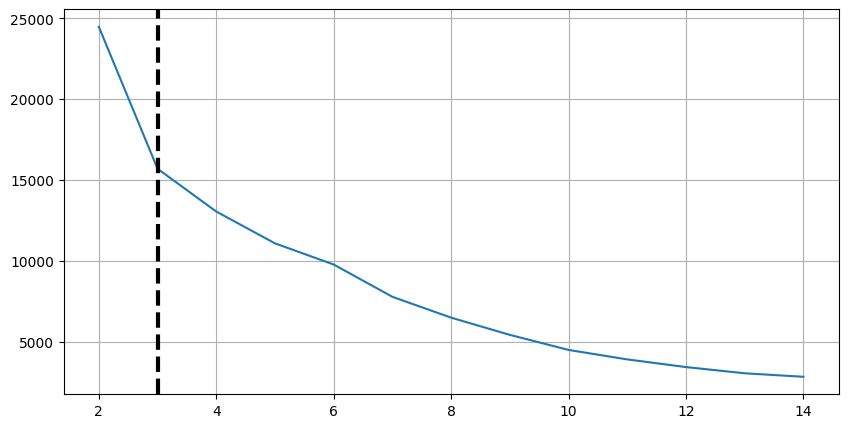

In [27]:
plt.plot(range(2,max_range),wcss)
plt.axvline(3,color='k',linestyle='--',linewidth='3')
plt.grid()
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3,random_state=42)
model = kmeans.fit(metric)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

<Axes: xlabel='count'>

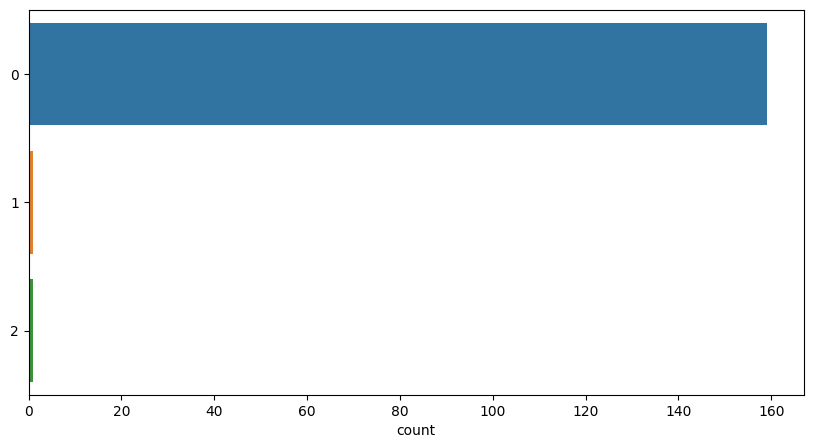

In [29]:
sns.countplot(y=model.labels_)

In [30]:
df['label'] = pd.Series(model.labels_)
df.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US),label
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028,0
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979,0
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336,0
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122,0
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426,0


In [31]:
df[df['label']==2]

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US),label
65,2009,AIG,BANK,4.04,75447.0,18614.0,-12244.0,-90.48,27765.0,98076.0,...,1.1552,-45.3061,-1.5123,-6.0641,-16.2286,137.3287,-13.9507,96000,-0.3555,2


In [32]:
df[df['label']==1]

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US),label
63,2011,AIG,BANK,44.06,65105.0,18692.0,19810.0,11.01,15225.0,102393.0,...,0.7349,18.4222,3.4107,10.6183,30.4278,-121.5022,18.4222,57000,3.1568,1


In [33]:
df

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US),label
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.1100,130541.0,50672.0,...,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028,0
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.6100,120233.0,63090.0,...,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979,0
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.2800,77344.0,65339.0,...,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336,0
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.9700,76477.0,90488.0,...,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122,0
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.9800,81801.0,107147.0,...,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2013,AMZN,LOGI,182.54,74452.0,20271.0,274.0,0.0295,3998.0,9746.0,...,0.3274,2.8114,0.6823,2.1180,0.3680,0.1748,3.8641,117300,1.4648,0
157,2012,AMZN,LOGI,113.63,61093.0,15122.0,-39.0,-0.0045,2835.0,8192.0,...,0.3765,-0.4761,-0.1198,-0.3459,-0.0638,-0.1833,-0.6915,88400,2.0693,0
158,2011,AMZN,LOGI,78.72,48077.0,10789.0,631.0,0.0685,1945.0,7757.0,...,0.0329,8.1346,2.4962,7.8757,1.3125,-0.0490,10.8756,56200,3.1568,0
159,2010,AMZN,LOGI,80.79,34204.0,7643.0,1152.0,0.1265,1974.0,6864.0,...,0.2274,16.7832,6.1286,13.6736,3.3680,-0.0544,20.8885,33700,1.6400,0


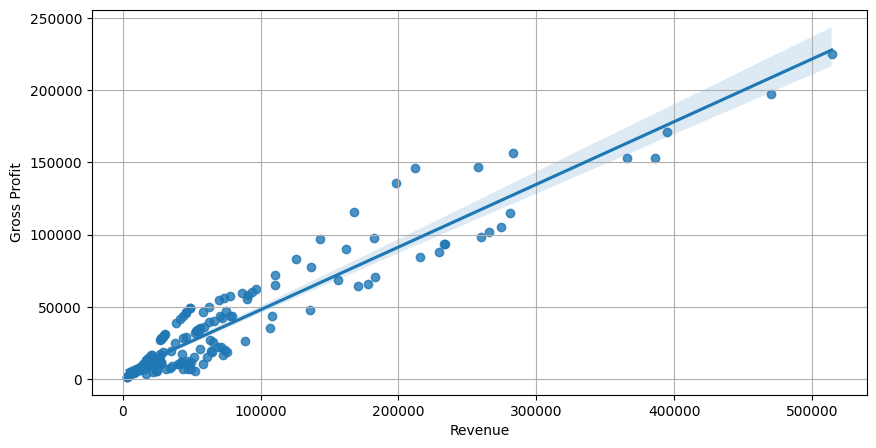

In [34]:
sns.regplot(x='Revenue',y='Gross Profit',data=df)
plt.grid()
plt.show()

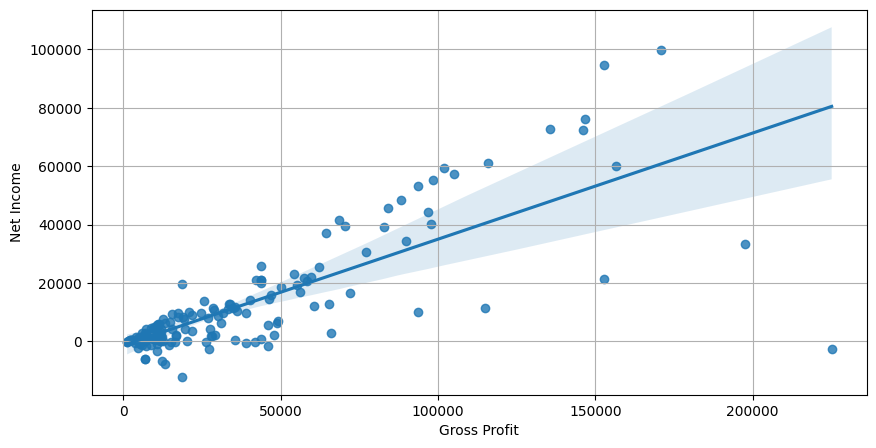

In [35]:
sns.regplot(x='Gross Profit',y='Net Income',data=df)
plt.grid()
plt.show()

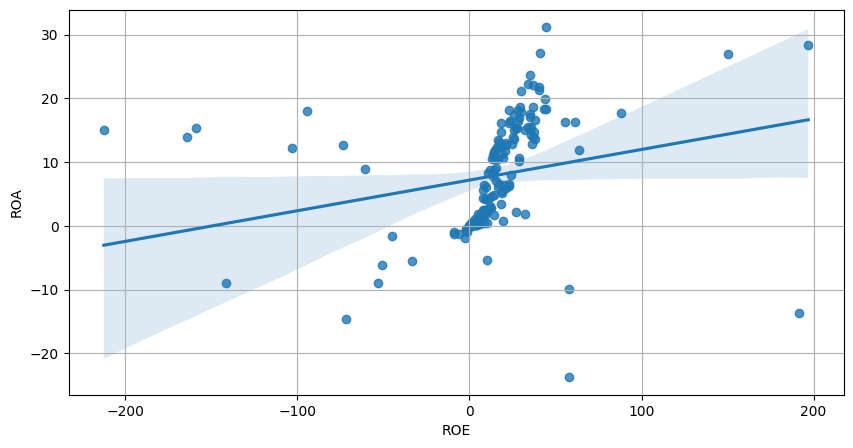

In [36]:
sns.regplot(x='ROE',y='ROA',data=df)
plt.grid()
plt.show()

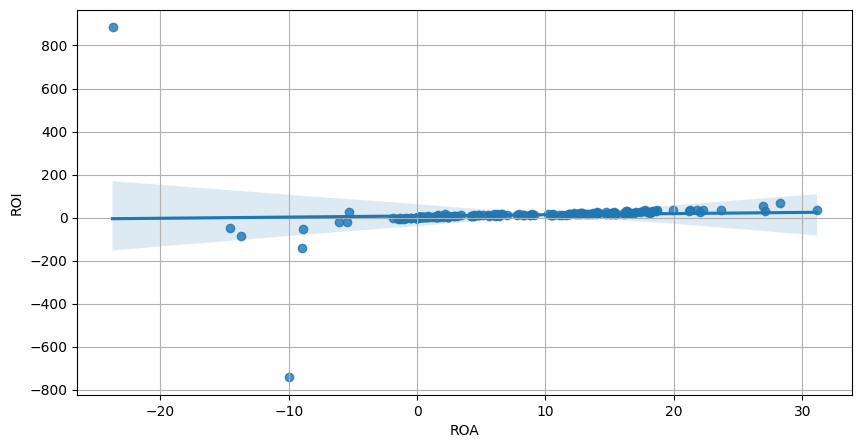

In [37]:
sns.regplot(x='ROA',y='ROI',data=df)
plt.grid()
plt.show()

In [38]:
import plotly.express as px

In [40]:
px.scatter_3d(data_frame=df,x='ROE',y='ROA',z='ROI')